# Lending Club EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loan_2016 data

In [2]:
# check columns(16,37) to confirm the warning message

df = pd.read_csv('loan_2016.csv') 

C:\Users\Weiqun\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2718: DtypeWarning: Columns (16,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
cols=df.columns.values

In [4]:
print (cols[[16,37]])

['verificationstatusjoint' 'desc']


In [5]:
df[cols[16]].dtype

dtype('O')

In [6]:
df[cols[37]].dtype

dtype('O')

## 19 object, 89 numeric (but 14 of them are all Nulls)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434407 entries, 0 to 434406
Columns: 108 entries, secappopenactil to loanstatus
dtypes: float64(88), int64(1), object(19)
memory usage: 357.9+ MB


## Find all_null_feature, num_feature, ob_feature

In [8]:
all_null_feature=[]
num_feature=[]
ob_feature=[]
for col in cols:
    if df[col].isnull().sum()==df.shape[0]:
        all_null_feature.append(col)
    else:
        if df[col].dtype == 'object':
            ob_feature.append(col)
        else:
            num_feature.append(col)
            if df[col].dtype == 'int64':
                print (col + " is int")
    

id is int


In [9]:
print len(num_feature), len(ob_feature)
print len(all_null_feature)

75 19
14


In [10]:
all_null_feature

['secappopenactil',
 'secappnumrevaccts',
 'secappmthssincelastmajorderog',
 'secappcollections12mthsexmed',
 'revolbaljoint',
 'secappopenacc',
 'secappficorangelow',
 'memberid',
 'secappmortacc',
 'secappearliestcrline',
 'secappchargeoffwithin12mths',
 'secapprevolutil',
 'secappficorangehigh',
 'secappinqlast6mths']

In [11]:
num_feature

['bcopentobuy',
 'numactvbctl',
 'mthssincelastrecord',
 'totcurbal',
 'mosinrcnttl',
 'openrv12m',
 'inqlast12m',
 'mortacc',
 'mthssincelastdelinq',
 'numactvrevtl',
 'tothicredlim',
 'ficorangehigh',
 'maxbalbc',
 'openil24m',
 'numbctl',
 'totalrevhilim',
 'totcollamt',
 'numtl120dpd2m',
 'totalbalexmort',
 'annualincjoint',
 'ficorangelow',
 'totalacc',
 'mthssincerecentbcdlq',
 'installment',
 'numrevaccts',
 'pubrec',
 'accopenpast24mths',
 'numoprevtl',
 'avgcurbal',
 'openactil',
 'dti',
 'openacc6m',
 'totalbalil',
 'delinq2yrs',
 'fundedamnt',
 'mosinoldilacct',
 'annualinc',
 'inqfi',
 'numtl30dpd',
 'loanamnt',
 'numsats',
 'mthssincerecentrevoldelinq',
 'mthssincerecentbc',
 'id',
 'revolbal',
 'inqlast6mths',
 'mthssincercntil',
 'openrv24m',
 'totalilhighcreditlimit',
 'collections12mthsexmed',
 'chargeoffwithin12mths',
 'numtl90gdpd24m',
 'delinqamnt',
 'mosinoldrevtlop',
 'taxliens',
 'numbcsats',
 'totalbclimit',
 'dtijoint',
 'numacctsever120pd',
 'accnowdelinq',
 '

In [12]:
ob_feature

['initialliststatus',
 'grade',
 'subgrade',
 'verificationstatusjoint',
 'earliestcrline',
 'applicationtype',
 'intrate',
 'desc',
 'term',
 'homeownership',
 'addrstate',
 'revolutil',
 'zipcode',
 'verificationstatus',
 'emptitle',
 'emplength',
 'purpose',
 'issued',
 'loanstatus']

In [13]:
i=0
feat = ob_feature[i]
print feat

initialliststatus


In [14]:
print df[feat].isnull().sum()
df[feat].value_counts()

0


w    333732
f    100675
Name: initialliststatus, dtype: int64

In [15]:
i=1
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
df[feat].value_counts()

grade
0


B    134512
C    132178
A     70847
D     59178
E     25807
F      9334
G      2551
Name: grade, dtype: int64

In [16]:
i=2
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
df[feat].value_counts()

subgrade
0


C1    31576
B5    31339
B4    29053
C2    26596
B3    25898
C4    25878
C3    25290
B1    24466
B2    23756
C5    22838
A1    18722
A5    16631
D1    15166
A4    14731
D2    14361
D3    10828
A2    10748
D4    10385
A3    10015
D5     8438
E1     7472
E3     5242
E2     5023
E4     4351
E5     3719
F1     2858
F2     2189
F3     1691
F4     1392
F5     1204
G1      776
G2      622
G3      480
G4      367
G5      306
Name: subgrade, dtype: int64

In [17]:
# most is null, very small portion （2%） is Not Verified
i=3
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
df[feat].value_counts()

verificationstatusjoint
425618


Not Verified    8789
Name: verificationstatusjoint, dtype: int64

In [18]:
# date format, convert to time difference, eg, months to 2019 and thus is a numeric feature
# when the time is too late, it might be not reliable for short period of credit behavior; when the time is too early, it means very old lender.
i=4
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
df[feat].value_counts()

earliestcrline
0


Sep-2003    3273
Aug-2003    3273
Sep-2004    3224
Sep-2005    3126
Aug-2004    3106
Aug-2002    2996
Oct-2003    2974
Aug-2005    2957
Oct-2004    2909
Sep-2002    2907
Aug-2001    2858
Jul-2003    2825
Oct-2002    2727
Jul-2004    2693
Oct-2001    2683
Mar-2004    2677
Nov-2004    2648
Aug-2006    2637
Aug-2000    2588
Oct-2005    2490
Mar-2005    2472
Nov-2002    2469
Jun-2005    2458
Jun-2003    2443
Jul-2002    2414
Nov-2003    2412
May-2004    2387
Jun-2004    2379
Dec-2004    2377
Jul-2005    2374
            ... 
Apr-1955       1
Feb-1960       1
Mar-1962       1
Jun-1959       1
Jun-1958       1
Feb-1945       1
Jun-1952       1
Jun-1957       1
Mar-1933       1
Sep-1963       1
Nov-1960       1
Feb-1962       1
May-1958       1
Jul-1961       1
Jun-1961       1
Jul-1951       1
Nov-1957       1
Jan-1948       1
Jul-1952       1
Aug-1941       1
Oct-1961       1
Jan-1955       1
Aug-1960       1
May-1961       1
Aug-1962       1
Jan-1953       1
Jan-1952       1
Mar-1957      

In [19]:
# Mainly individual, 2% joint app. consistent with 'verificationstatusjoint', means that it only has one variance 'not verified', thus can be excluded from modeling.

i=5
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
df[feat].value_counts()

applicationtype
0


Individual    425618
Joint App       8789
Name: applicationtype, dtype: int64

In [20]:
i=6
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
df[feat].value_counts()

intrate
0


  5.32%    18722
 11.49%    17432
 13.99%    15192
 11.99%    14545
 13.49%    14002
 11.47%    11808
  9.75%    11770
 10.75%    11683
 10.49%    11655
 18.99%    11123
 12.99%    10736
  9.16%    10396
 13.67%     9990
 12.79%     9897
  8.39%     9638
 14.46%     9626
 10.99%     9546
 14.49%     8875
  7.39%     8760
 19.99%     8721
 17.99%     8495
  7.89%     8210
 15.31%     8131
 15.59%     8023
 16.99%     7486
 12.74%     7121
  9.49%     7083
  8.99%     6988
 16.29%     6509
  6.49%     6416
           ...  
 26.06%      109
 30.84%       87
 30.89%       67
 30.94%       51
 27.99%       39
 13.18%       34
  9.76%       32
 12.59%       31
 10.64%       31
 11.22%       27
 28.49%       26
  8.38%       25
 14.48%       24
 15.41%       21
 17.57%       15
 16.55%       13
  7.26%       13
  6.24%        9
 17.86%        7
  6.89%        7
 22.99%        3
 27.31%        3
 18.20%        3
 25.99%        2
 21.99%        2
 26.77%        2
 14.77%        2
 15.29%       

In [21]:
# only 23 not null values and 6 of them are space. simply drop it
# in the 2014 data, there are more not null data in this column, you might want to drop it or classify them to null and not_null, short v.s. long
# this part might be quite similar to the purpose feature, which is quite important.

i=7
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
df[feat].value_counts()

desc
434384


In [22]:
len(df[df[feat].isnull() ==0][feat])

23

In [23]:
print (df[df[feat].isnull() ==0][feat])

13860     I would like to pay off 3 different credit car...
28606     I have problems with one of my loans what I ha...
35660     I'm looking to consolidate all of my outstandi...
44216     Hello, I have a credit card consolidation loan...
46710                                                      
50176                                                      
68485                                                      
98168     My wife and I are having our first child in Ma...
116992                                                     
123722    I recently married and since this was the seco...
137210    Temporary cash flow challenges. Would like thi...
176962      I am looking to pay off my credit card debts.  
184425    Hi! So $5,500 doesn't sound like much to be de...
201865    I developed poor credit in college due to not ...
221592    1:1 Income to Debt ratio; this required excell...
222565    This loan is to pay off a few debts and put me...
251815                                  

In [24]:
# only use 36 months data for our project
i=8
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
print df.term.value_counts(normalize=True)
df[feat].value_counts()

term
0
 36 months    0.744682
 60 months    0.255318
Name: term, dtype: float64


 36 months    323495
 60 months    110912
Name: term, dtype: int64

In [25]:
# one hot encoding, but ignore the 1 data point ANY?
i=9
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
df[feat].value_counts()

homeownership
0


MORTGAGE    211516
RENT        169744
OWN          53037
ANY            110
Name: homeownership, dtype: int64

In [26]:
#50 states, can generate frequency and leave-one-out encoding
i=10
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
print len(df[feat].value_counts()), df[feat].value_counts()

addrstate
0
50 CA    57888
TX    37036
NY    35505
FL    31727
IL    17715
NJ    15891
OH    14999
PA    14502
GA    14459
NC    12279
VA    11687
MI    11604
AZ    10462
MD    10071
MA     9830
CO     8798
WA     8301
MN     7699
IN     7658
TN     7272
MO     6951
CT     6794
NV     6164
WI     5791
SC     5492
AL     5329
LA     4985
OR     4669
KY     4225
OK     4061
KS     3567
AR     3335
MS     2867
UT     2796
NM     2286
NE     2116
NH     2097
HI     2019
RI     1881
ME     1409
DE     1252
ID     1225
MT     1172
ND     1051
AK     1006
DC      958
VT      942
WY      935
SD      879
WV      770
Name: addrstate, dtype: int64


In [27]:
# has null value; 0% means?  over 100% means?
i=11
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
print len(df[feat].value_counts()), df[feat].value_counts()

revolutil
264
1178 0%        1828
57%        955
55%        942
48%        935
61%        905
59%        903
58%        892
54%        886
51%        875
44%        872
56%        871
49%        865
50%        861
62%        861
45%        854
53%        850
64%        847
60%        846
43%        842
63%        837
47%        831
46%        830
38%        829
42%        828
68%        825
66%        825
65%        820
39%        813
52%        807
41%        806
          ... 
119%         1
137.9%       1
126.3%       1
123.3%       1
112.5%       1
109.8%       1
109.5%       1
131.3%       1
108.7%       1
116%         1
113%         1
126.6%       1
118.3%       1
139.9%       1
117.1%       1
144.3%       1
120.9%       1
145%         1
132.9%       1
172%         1
109.9%       1
124.7%       1
111.7%       1
136.7%       1
105.3%       1
107.7%       1
112.9%       1
128%         1
156.3%       1
108.1%       1
Name: revolutil, Length: 1178, dtype: int64


In [28]:
i=12
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
print len(df[feat].value_counts()) #, df[feat].value_counts()

zipcode
0
911


In [29]:
# only keep first 3 digits, 866 values, use frequency and leave on out encoding
i=13
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
print len(df[feat].value_counts()), df[feat].value_counts()[:5], df[feat].value_counts()[-5:]

verificationstatus
0
3 Source Verified    181315
Not Verified       126807
Verified           126285
Name: verificationstatus, dtype: int64 Source Verified    181315
Not Verified       126807
Verified           126285
Name: verificationstatus, dtype: int64


In [30]:
# Null values means not working? 
# can do frequency and simple NLP
i=14
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
print len(df[feat].value_counts()) , df[feat].value_counts()[:5] #, df[feat].value_counts()[-5:]

emptitle
28492
121664 Teacher             8248
Manager             7403
Owner               5007
Registered Nurse    3381
RN                  3282
Name: emptitle, dtype: int64


In [31]:
# n/a consistent with n/a at employment title
i=15
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
print len(df[feat].value_counts()) , df[feat].value_counts()[:30]#, df[feat].value_counts()[-10:]

emplength
0
12 10+ years    149972
2 years       39601
3 years       34734
< 1 year      31918
1 year        29156
n/a           28214
5 years       26475
4 years       25820
8 years       18774
6 years       18656
9 years       16884
7 years       14203
Name: emplength, dtype: int64


In [32]:
# 12 values, n/a, <1 year, 1~9 year(s), 10+ years, convert to num
i=16
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
print len(df[feat].value_counts()) , df[feat].value_counts()[:12] #, df[feat].value_counts()[-10:]

purpose
0
13 debt_consolidation    248899
credit_card            91609
home_improvement       31182
other                  28469
major_purchase         10406
medical                 5440
car                     4813
small_business          4790
vacation                3262
moving                  3229
house                   2002
renewable_energy         304
Name: purpose, dtype: int64


In [33]:
# more than 50% debt_consolidation
i=17
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
print len(df[feat].value_counts()) , df[feat].value_counts()[:15] #, df[feat].value_counts()[-10:]

issued
0
12 Mar-2016    61992
Feb-2016    39529
Apr-2016    36432
Aug-2016    36280
Dec-2016    36183
Jul-2016    34696
Nov-2016    34591
Jun-2016    33019
Oct-2016    32772
Jan-2016    32366
May-2016    28403
Sep-2016    28144
Name: issued, dtype: int64


In [34]:
i=18
feat = ob_feature[i]
print feat
print df[feat].isnull().sum()
print len(df[feat].value_counts()) , df[feat].value_counts()[:15] #, df[feat].value_counts()[-10:]

loanstatus
0
7 Fully Paid            290622
Charged Off            74993
Current                64730
Late (31-120 days)      2589
In Grace Period         1053
Late (16-30 days)        417
Default                    3
Name: loanstatus, dtype: int64


## For an issued loan, fundedamnt=loanamnt, drop fundedamnt

,fundedamnt,loanamnt
0,6000.0,6000.0
1,21000.0,21000.0
2,7200.0,7200.0
3,11200.0,11200.0
4,12000.0,12000.0
5,11425.0,11425.0
6,30000.0,30000.0
7,20625.0,20625.0
8,19200.0,19200.0
9,4000.0,4000.0


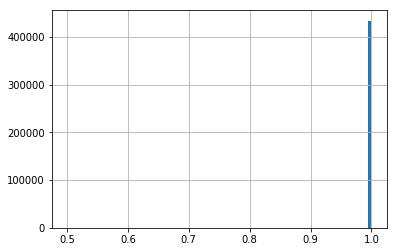

In [35]:
df.ratio=df.fundedamnt/df.loanamnt.astype(float,3)
df.ratio.hist(bins=100)
df[['fundedamnt','loanamnt']][:10]

##### Histogram

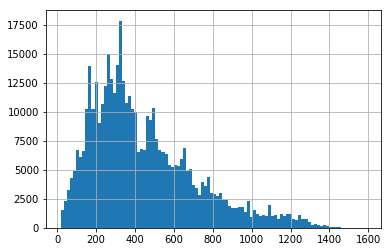

In [36]:
df.installment.hist(bins=100)

##### Meanr response

In [37]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")

In [38]:
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [39]:
dummy_list = ["emplength", "verificationstatus", "delinq2yrs", "addrstate", 'homeownership', 
              "grade", "subgrade", "openacc", 'applicationtype', 'initialliststatus']
n = len(dummy_list)

In [55]:
n

10

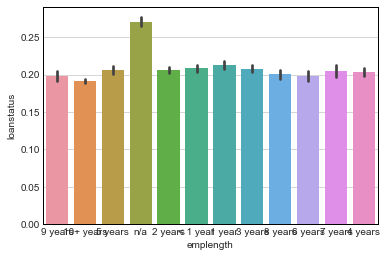

In [59]:
sns.barplot(x=dummy_list[0], y='loanstatus', data=df)

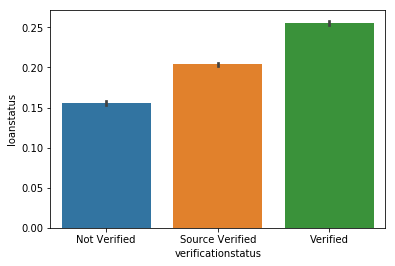

In [40]:
# why verified incomes gives higher default rates?
# not varified means not necessary to verify?

sns.barplot(x=dummy_list[1], y='loanstatus', data=df)

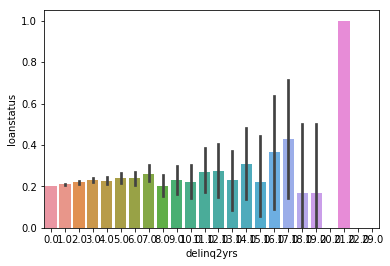

In [41]:
sns.barplot(x=dummy_list[2], y='loanstatus', data=df)

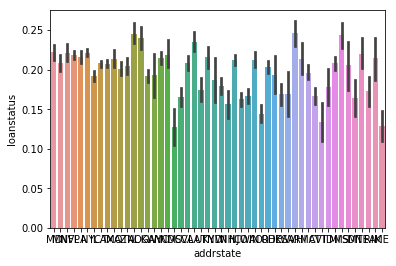

In [42]:
sns.barplot(x=dummy_list[3], y='loanstatus', data=df)

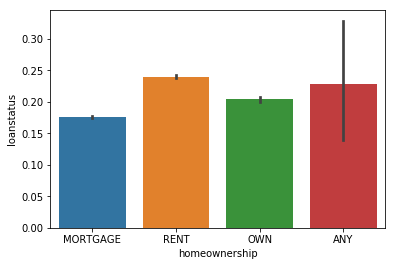

In [43]:
sns.barplot(x=dummy_list[4], y='loanstatus', data=df)

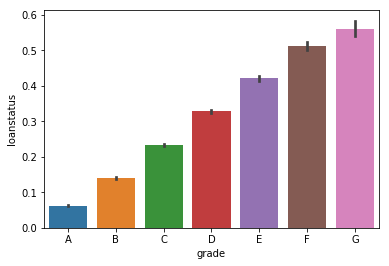

In [44]:
sns.barplot(x=dummy_list[5], y='loanstatus', data=df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

In [45]:
np.sort(df.subgrade.unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

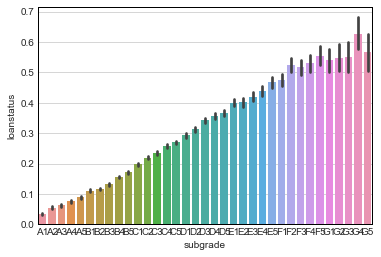

In [61]:
sns.barplot(x=dummy_list[6], y='loanstatus', data=df, order = np.sort(df.subgrade.unique()))

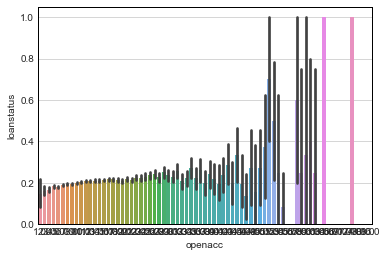

In [60]:
sns.barplot(x=dummy_list[7], y='loanstatus', data=df)

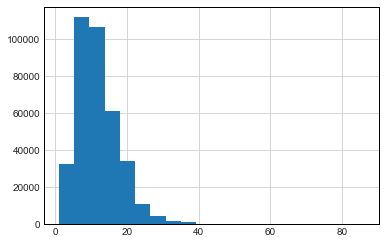

In [69]:
df.openacc.hist(bins=20)

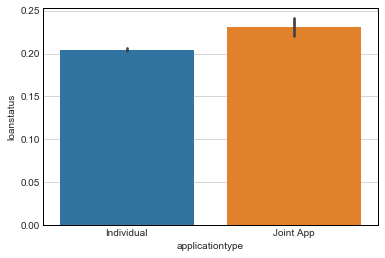

In [77]:
sns.barplot(x=dummy_list[8], y='loanstatus', data=df)

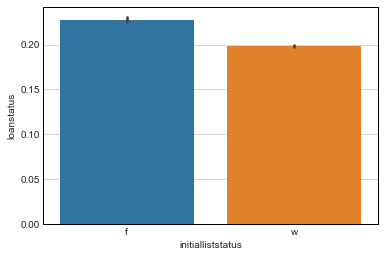

In [76]:
sns.barplot(x=dummy_list[9], y='loanstatus', data=df)

In [47]:
def countinuous_variable_plot(feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    factor = pd.qcut(df[feat_name], 5, labels = False) #groups the data act on groups                                                               #seperately
    table = df.groupby([factor, 'loanstatus']).size() #gets group size counts, hashed by the two variables
    table = table.unstack('loanstatus') #splits the data into 2 columns, 0, 1, each indexed by the
    normedtable = table.div(table.sum(1), axis=0) #divides the counts by the totals
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    normedtable.ix[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10", ax = ax )
    ax.set_xlabel("%s percentile" % feat_name , fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(x, labels, rotation='0', fontsize = 18)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat_name )
    fig.savefig('age.jpg')

C:\Users\Weiqun\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


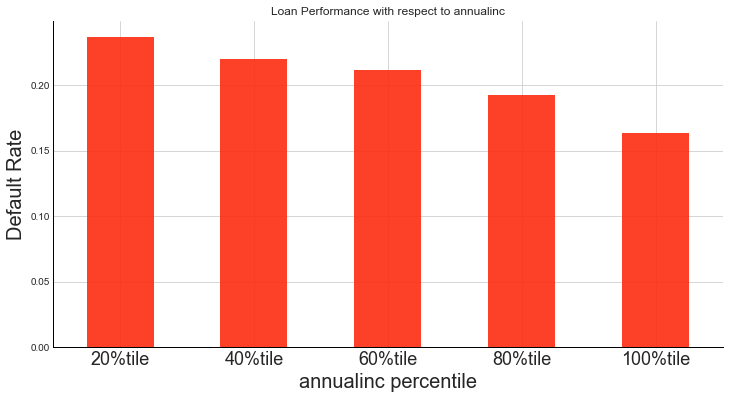

In [48]:
countinuous_variable_plot('annualinc')

C:\Users\Weiqun\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


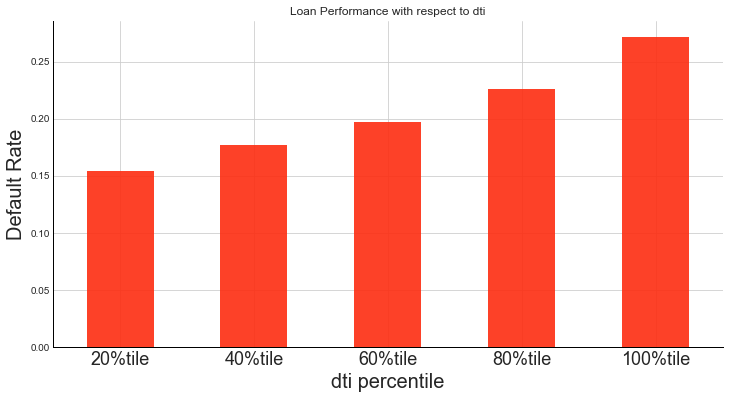

In [49]:
countinuous_variable_plot('dti')

C:\Users\Weiqun\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


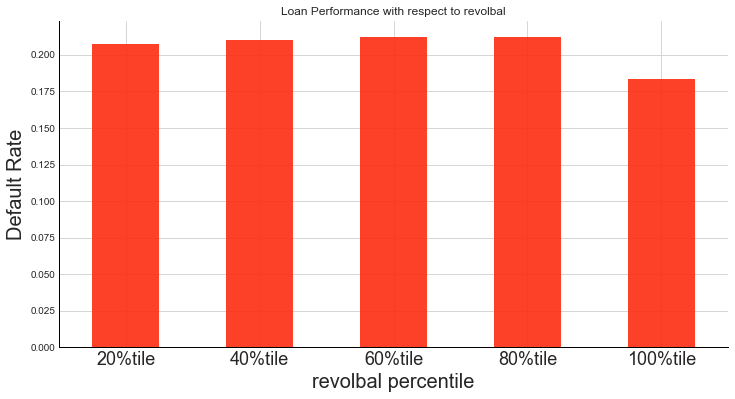

In [50]:
countinuous_variable_plot('revolbal')

C:\Users\Weiqun\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


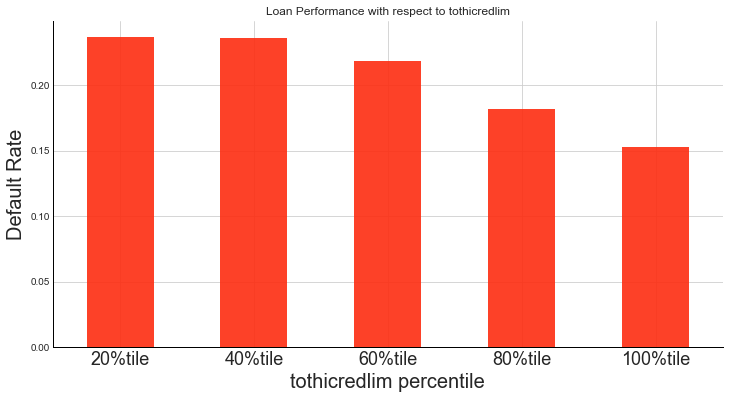

In [51]:
countinuous_variable_plot('tothicredlim')

C:\Users\Weiqun\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


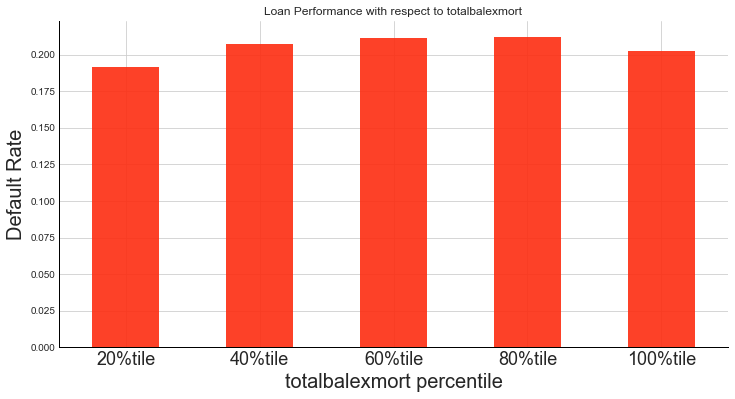

In [52]:
countinuous_variable_plot('totalbalexmort')

C:\Users\Weiqun\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


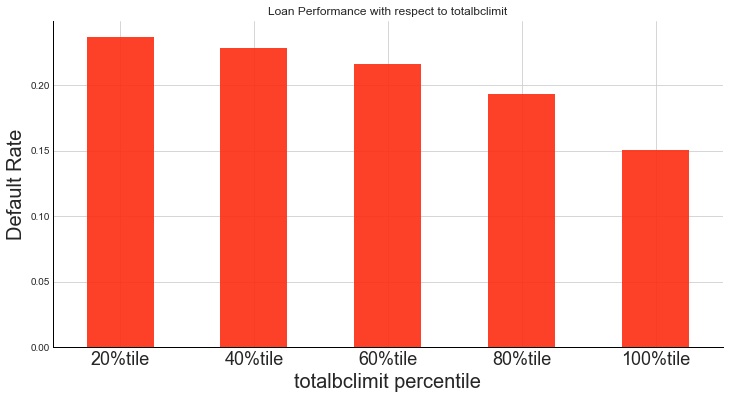

In [53]:
countinuous_variable_plot('totalbclimit')

C:\Users\Weiqun\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


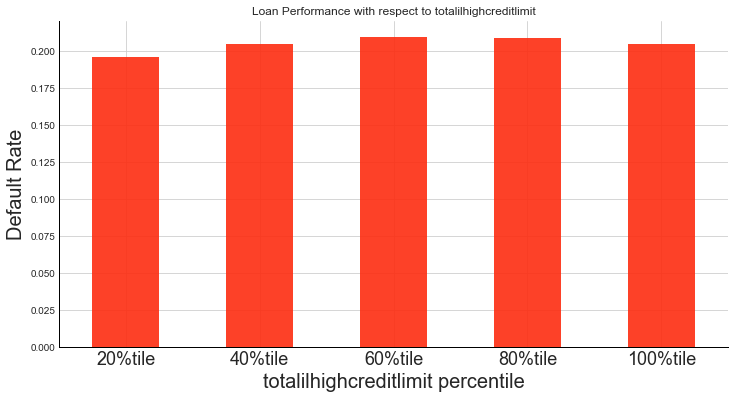

In [54]:
countinuous_variable_plot('totalilhighcreditlimit')